In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


In [42]:
# Import data
df = pd.read_csv('BusStopData.csv')
 # Drop repeat columns created by Google Forms
df.drop(df.columns[18:], axis=1, inplace=True)
df.shape
# (Observations, Columns)

(34, 18)

In [43]:
df.nunique()

Timestamp                                  33
Recording data from                         2
Stop location                               4
Bus number                                  2
EE: Enqueued at the end-side                2
EB: Enqueued at the front/bus stop side     2
CU: Cut in line                             2
PP: Prepared with Pronto App                2
DP: Displayed Pronto App                    2
SP: Scanned Pronto App                      3
WH: Wearing headphones                      2
WE: Wearing earbuds                         2
SI: Sitting                                 2
UA: Undergraduate Appearance                2
HP: Hands in pockets                        2
CE: Concurrent entrance dilemma             2
PF: Let peer go first                       2
IG: In a group                              2
dtype: int64

In [44]:
df.dtypes

Timestamp                                   object
Recording data from                         object
Stop location                               object
Bus number                                 float64
EE: Enqueued at the end-side                object
EB: Enqueued at the front/bus stop side     object
CU: Cut in line                             object
PP: Prepared with Pronto App                object
DP: Displayed Pronto App                    object
SP: Scanned Pronto App                      object
WH: Wearing headphones                      object
WE: Wearing earbuds                         object
SI: Sitting                                 object
UA: Undergraduate Appearance                object
HP: Hands in pockets                        object
CE: Concurrent entrance dilemma             object
PF: Let peer go first                       object
IG: In a group                              object
dtype: object

In [45]:
# Transform null (N/A) values to custom flag
df.fillna('n/a', inplace=True)
df.dtypes

/var/folders/ld/s8p1wyns2txf6czmb7pkx43r0000gn/T/ipykernel_9791/1096805773.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'n/a' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('n/a', inplace=True)


Timestamp                                  object
Recording data from                        object
Stop location                              object
Bus number                                 object
EE: Enqueued at the end-side               object
EB: Enqueued at the front/bus stop side    object
CU: Cut in line                            object
PP: Prepared with Pronto App               object
DP: Displayed Pronto App                   object
SP: Scanned Pronto App                     object
WH: Wearing headphones                     object
WE: Wearing earbuds                        object
SI: Sitting                                object
UA: Undergraduate Appearance               object
HP: Hands in pockets                       object
CE: Concurrent entrance dilemma            object
PF: Let peer go first                      object
IG: In a group                             object
dtype: object

In [46]:
# Convert timestamps to datetime objects for future functions
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

# Convert "Yes" to True, and "No" to False
df.replace({'Yes':True, 'No':False}, inplace=True)
df['Timestamp'].head()

# Rename columns for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Check out the dataframe
df.head()


/var/folders/ld/s8p1wyns2txf6czmb7pkx43r0000gn/T/ipykernel_9791/1443542735.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes':True, 'No':False}, inplace=True)


,timestamp,recording_data_from,stop_location,bus_number,ee:_enqueued_at_the_end-side,eb:_enqueued_at_the_front/bus_stop_side,cu:_cut_in_line,pp:_prepared_with_pronto_app,dp:_displayed_pronto_app,sp:_scanned_pronto_app,wh:_wearing_headphones,we:_wearing_earbuds,si:_sitting,ua:_undergraduate_appearance,hp:_hands_in_pockets,ce:_concurrent_entrance_dilemma,pf:_let_peer_go_first,ig:_in_a_group
0,2024-01-22 12:31:32,Bus stop,Regents,201.0,n/a,n/a,n/a,False,False,False,False,True,False,True,False,False,n/a,False
1,2024-01-22 12:31:58,Bus stop,Regents,201.0,n/a,n/a,n/a,False,True,False,False,True,False,True,False,False,n/a,False
2,2024-01-22 12:32:16,Bus stop,Regents,201.0,n/a,n/a,n/a,True,True,False,False,True,True,True,False,False,n/a,False
3,2024-01-22 12:34:44,Bus stop,Regents,201.0,n/a,n/a,n/a,False,False,False,False,False,True,False,True,False,n/a,False
4,2024-01-22 12:34:44,Bus stop,Regents,201.0,True,False,False,True,True,False,False,True,True,True,False,False,n/a,False


In [47]:
# Define a function to plot our categorical variables
def plot_categorical(df,
                     plottype=None, 
                     col_name=None, 
                     hue_name=None, 
                     title=None, 
                     xlabel=None, 
                     ylabel=None, 
                     color_palette=None, 
                     legend=None, 
                     legend_title=None):
    if plottype == 'countplot':
        ax = sns.countplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
    elif plottype == 'histplot':
        ax = sns.histplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
    elif  plottype == 'barplot':
        ax = sns.barplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
    ax.legend().set_title(legend_title)
    y_max = ax.get_ylim()[1]
    # Extend the y-axis limit to create space for the annotations
    ax.set_ylim(0, y_max * 1.2)  # Increase y-axis max by 20%
    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    # Make all y-axis be whole numbers
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()


/var/folders/ld/s8p1wyns2txf6czmb7pkx43r0000gn/T/ipykernel_9791/3923638451.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


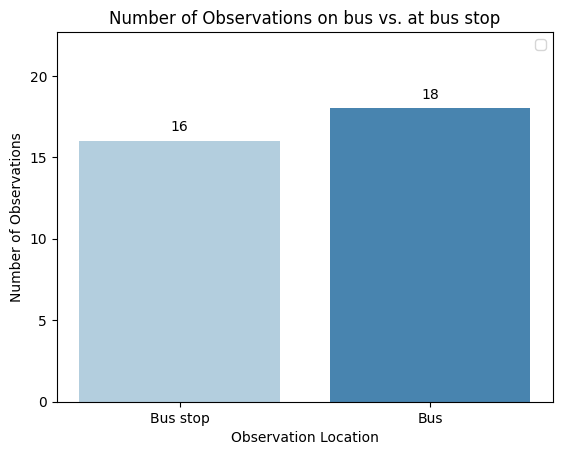

In [48]:
# Plot how if I was on or off of the bus
plot_categorical(df, 
                 plottype='countplot',
                 col_name='recording_data_from', 
                 hue_name=None,
                 title='Number of Observations on bus vs. at bus stop', 
                 xlabel='Observation Location', 
                 ylabel='Number of Observations',
                 color_palette='Blues',
                 legend=False)

/var/folders/ld/s8p1wyns2txf6czmb7pkx43r0000gn/T/ipykernel_9791/3923638451.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


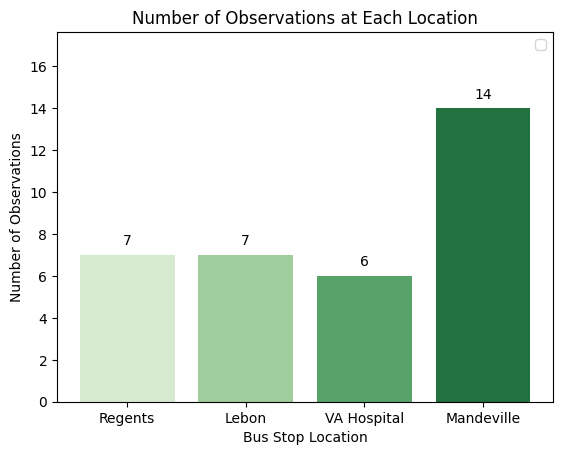

In [49]:
# Plot which stops I made my observations at
plot_categorical(df, 
                 plottype='countplot',
                 col_name='stop_location', 
                 title='Number of Observations at Each Location', 
                 xlabel='Bus Stop Location', 
                 ylabel='Number of Observations',
                 color_palette='Greens')

/var/folders/ld/s8p1wyns2txf6czmb7pkx43r0000gn/T/ipykernel_9791/3923638451.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


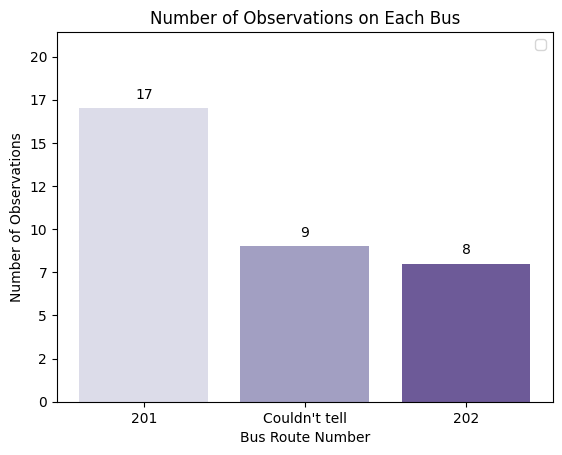

In [50]:
# Rephrase Not Applicables for context
df.loc[df['bus_number'] == 'n/a', 'bus_number'] = "Couldn't tell"
# Decimals on bus numbers don't make sense
def remove_decimal(x):
    try:
        return int(float(x))
    except ValueError:
        return x
# Apply the function to the 'bus_number' column
df['bus_number'] = df['bus_number'].apply(remove_decimal)
# Plot how many observations I made on each bus number
plot_categorical(df, 
                 plottype='countplot',
                 col_name='bus_number', 
                 title='Number of Observations on Each Bus', 
                 xlabel='Bus Route Number', 
                 ylabel='Number of Observations',
                 color_palette='Purples')

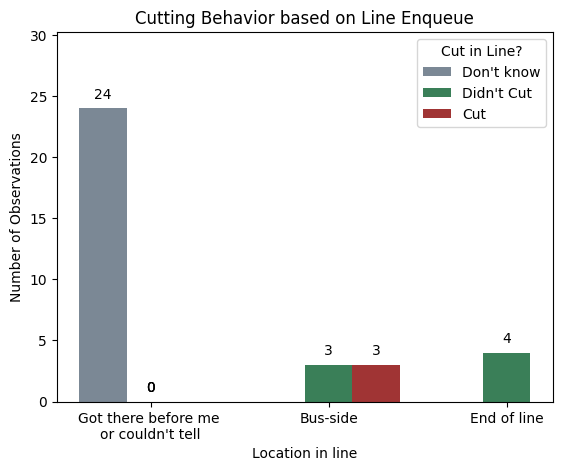

In [51]:
# # Plot where subjects got into line at the bust stop
df['cu:_cut_in_line'] = ['Cut' if x == True else x for x in df['cu:_cut_in_line']]
df['cu:_cut_in_line'] = ["Didn't Cut" if x == False else x for x in df['cu:_cut_in_line']]
df['cu:_cut_in_line'] = ["Don't know" if x == 'n/a' else x for x in df['cu:_cut_in_line']]
# # Combine columns
def combine_columns(row):
    if row['ee:_enqueued_at_the_end-side'] == 'n/a' and row['eb:_enqueued_at_the_front/bus_stop_side'] == 'n/a':
        return "Got there before me \nor couldn't tell"
    elif row['ee:_enqueued_at_the_end-side']:
        return 'Bus-side'
    elif row['eb:_enqueued_at_the_front/bus_stop_side']:
        return 'End of line'
# Apply the function to each row
df['entered_line_where'] = df.apply(combine_columns, axis=1)
# Drop the original columns without reassigning df
df.drop(['ee:_enqueued_at_the_end-side', 'eb:_enqueued_at_the_front/bus_stop_side'], axis=1, inplace=True)
# Rephrase Not Applicables for context
hue_palette = {"Don't know" : 'lightslategray', "Cut" : 'firebrick', "Didn't Cut" : 'seagreen'}
ax = sns.countplot(df, x='entered_line_where', hue='cu:_cut_in_line', palette=hue_palette, legend=True)
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.2)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.title('Cutting Behavior based on Line Enqueue')
plt.xlabel('Location in line')
plt.ylabel('Number of Observations')
ax.legend().set_title('Cut in Line?')
plt.plot()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))


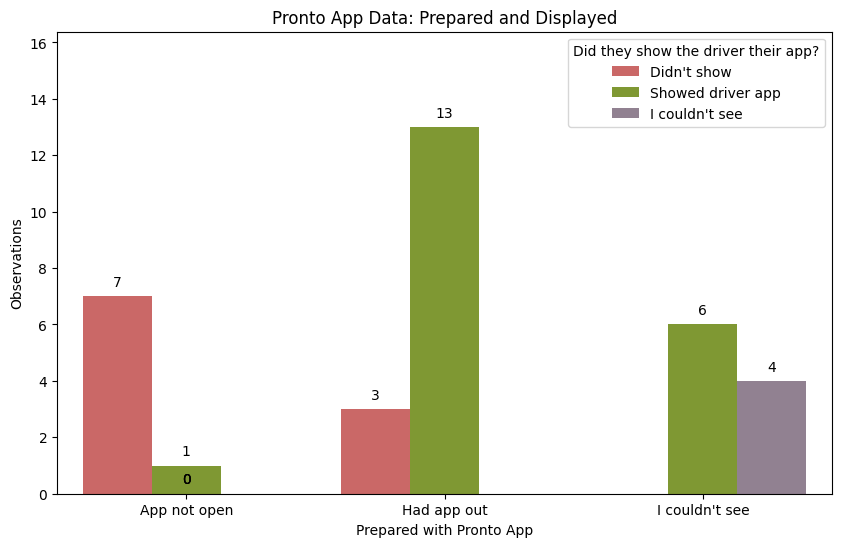

In [52]:
# Plot Pronto data
# Rename values for context
df['pp:_prepared_with_pronto_app'] = ['Had app out' if x == True else x for x in df['pp:_prepared_with_pronto_app']]
df['pp:_prepared_with_pronto_app'] = ['App not open' if x == False else x for x in df['pp:_prepared_with_pronto_app']]
df['pp:_prepared_with_pronto_app'] = ["I couldn't see" if x == 'n/a' else x for x in df['pp:_prepared_with_pronto_app']]

df['dp:_displayed_pronto_app'] = ['Showed driver app' if x == True else x for x in df['dp:_displayed_pronto_app']]
df['dp:_displayed_pronto_app'] = ["Didn't show" if x == False else x for x in df['dp:_displayed_pronto_app']]
df['dp:_displayed_pronto_app'] = ["I couldn't see" if x == 'n/a' else x for x in df['dp:_displayed_pronto_app']]

# Plotting
plt.figure(figsize=(10, 6))
hue_palette_pronto = {"I couldn't see" : '#947e94', "Didn't show" : '#db5856', "Showed driver app" : '#87a922'}
ax = sns.countplot(x='pp:_prepared_with_pronto_app', hue='dp:_displayed_pronto_app', palette=hue_palette_pronto, data=df)
plt.xlabel('Prepared with Pronto App')
plt.ylabel('Observations')
plt.title('Pronto App Data: Prepared and Displayed')
ax.legend().set_title('Did they show the driver their app?')
y_max = ax.get_ylim()[1]
# Extend the y-axis limit to create space for the annotations
ax.set_ylim(0, y_max * 1.2)  # Increase y-axis max by 20%
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()


In [53]:
# Determine if student was first or one of the first to board based 
# on timestamp range and bus stop
# First set column to False
df['first_to_board'] = False
# Manually pick out observations that were of students who boarded first
list_of_top_3 = [0,1,2,7,8,9,13,14,15,17,18,19,26,27,28,31,32,33]
for num in list_of_top_3:
    df.loc[num,'first_to_board'] = True

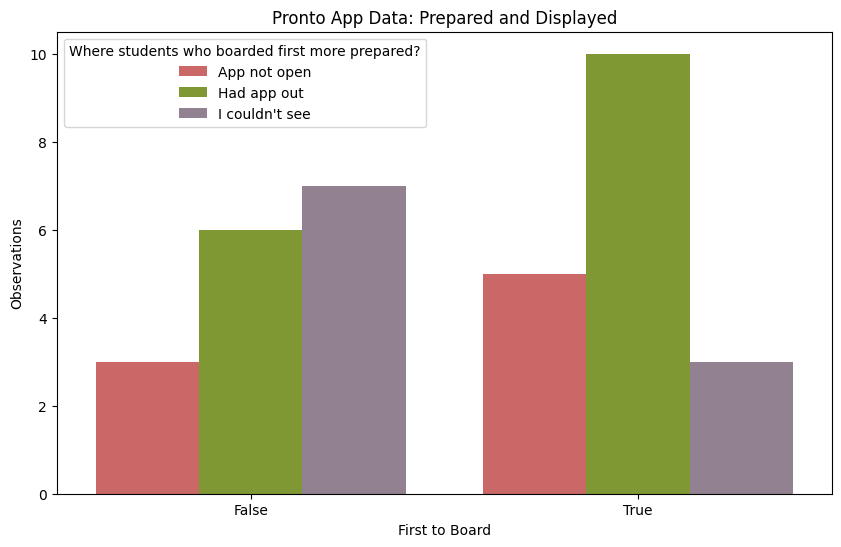

In [54]:
# Plot students who board first vs. those who don't with respect to prepared with pronto
plt.figure(figsize=(10, 6))
hue_palette_pronto = {"I couldn't see" : '#947e94', "App not open" : '#db5856', "Had app out" : '#87a922'}
ax = sns.countplot(x='first_to_board', hue='pp:_prepared_with_pronto_app', palette=hue_palette_pronto, data=df)
plt.xlabel('First to Board')
plt.ylabel('Observations')
plt.title('Pronto App Data: Prepared and Displayed')
ax.legend().set_title('Where students who boarded first more prepared?')



In [55]:
df.columns

Index(['timestamp', 'recording_data_from', 'stop_location', 'bus_number',
       'cu:_cut_in_line', 'pp:_prepared_with_pronto_app',
       'dp:_displayed_pronto_app', 'sp:_scanned_pronto_app',
       'wh:_wearing_headphones', 'we:_wearing_earbuds', 'si:_sitting',
       'ua:_undergraduate_appearance', 'hp:_hands_in_pockets',
       'ce:_concurrent_entrance_dilemma', 'pf:_let_peer_go_first',
       'ig:_in_a_group', 'entered_line_where', 'first_to_board'],
      dtype='object')

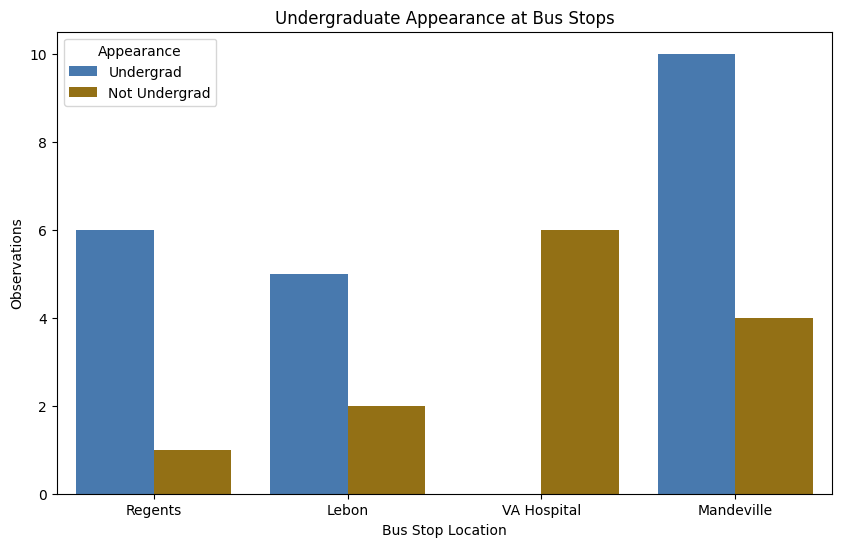

In [56]:
# Plot undergraduate appearance among bus stops
# Rename values for context
df['ua:_undergraduate_appearance'] = ['Undergrad' if x == True else x for x in df['ua:_undergraduate_appearance']]
df['ua:_undergraduate_appearance'] = ['Not Undergrad' if x == False else x for x in df['ua:_undergraduate_appearance']]
df['ua:_undergraduate_appearance'] = ["Identity unknown" if x == 'n/a' else x for x in df['ua:_undergraduate_appearance']]
# Plotting
plt.figure(figsize=(10, 6))
hue_palette_ua = {"Identity unknown" : '#947e94', "Undergrad" : '#3778bf', "Not Undergrad" : '#a87900'}
ax = sns.countplot(x='stop_location', hue='ua:_undergraduate_appearance', palette=hue_palette_ua, data=df)
plt.xlabel('Bus Stop Location')
plt.ylabel('Observations')
plt.title('Undergraduate Appearance at Bus Stops')
ax.legend().set_title('Appearance')



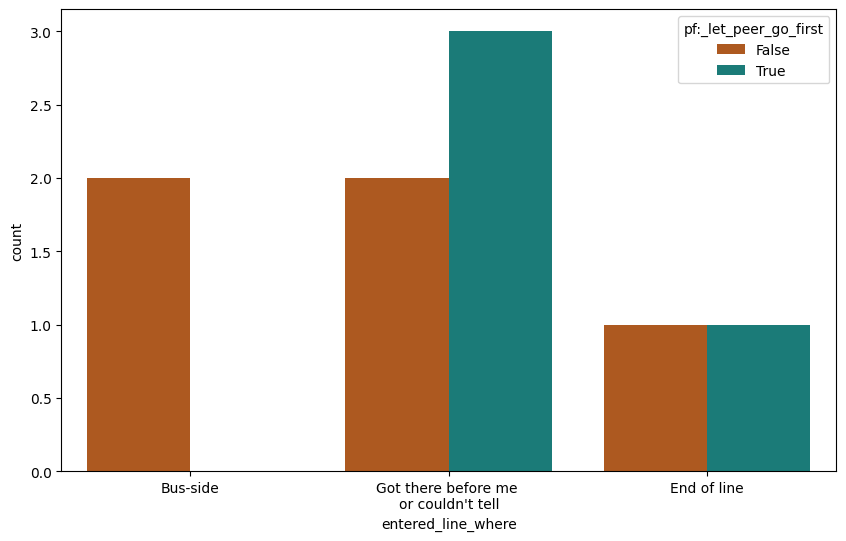

In [59]:
# Of students who encountered a concurrent entrance, who let who go first and 
# which line were they in
df_concurrent = df[df['ce:_concurrent_entrance_dilemma'] == True]
# Filter by students which line they entered from
# df_concurrent = df[df['entered_line_where'] != "Got there before me \nor couldn't tell"]

# Filter out observations where the student didn't know who went first
df_concurrent = df_concurrent[df_concurrent['pf:_let_peer_go_first'] != "n/a"]
# Filter observations where the student didn't know where they entered from

# Plotting
plt.figure(figsize=(10, 6))
hue_palette_concurrent = {'Bus-side': '#c45508', 'End of line' : '#0b8b87', "Got there before me \nor couldn't tell" : '#947e94'}
hue_palette_concurrent = {False: '#c45508', True : '#0b8b87'}

ax = sns.countplot(x='entered_line_where',hue='pf:_let_peer_go_first', palette=hue_palette_concurrent, data=df_concurrent)



In [18]:
df.head()

,timestamp,recording_data_from,stop_location,bus_number,cu:_cut_in_line,pp:_prepared_with_pronto_app,dp:_displayed_pronto_app,sp:_scanned_pronto_app,wh:_wearing_headphones,we:_wearing_earbuds,si:_sitting,ua:_undergraduate_appearance,hp:_hands_in_pockets,ce:_concurrent_entrance_dilemma,pf:_let_peer_go_first,ig:_in_a_group,entered_line_where,first_to_board
0,2024-01-22 12:31:32,Bus stop,Regents,201,Don't know,App not open,Didn't show,False,False,True,False,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
1,2024-01-22 12:31:58,Bus stop,Regents,201,Don't know,App not open,Showed driver app,False,False,True,False,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
2,2024-01-22 12:32:16,Bus stop,Regents,201,Don't know,Had app out,Showed driver app,False,False,True,True,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
3,2024-01-22 12:34:44,Bus stop,Regents,201,Don't know,App not open,Didn't show,False,False,False,True,Not Undergrad,True,False,n/a,False,Got there before me \nor couldn't tell,False
4,2024-01-22 12:34:44,Bus stop,Regents,201,Didn't Cut,Had app out,Showed driver app,False,False,True,True,Undergrad,False,False,n/a,False,Bus-side,False
